<h1><center> PPOL 5203 Data Science I: Foundations <br><br> 
<font color='grey'> Inferential Models and Machine Learning<br><br>
Tiago Ventura </center> <h1> 

---

## Learning Goals

In the class today, we will learn about model in Python. We will cover:

- Inferential models using `statsmodels`
    - Ordinary Least Squares
    - Logistic Regression
    - retrieving parameters of interest
   
- Statistical learning with `sklearn`
    - an workflow to rule them all
    - iterating through many models
    - model selection
    - cross-validation

## Introdutory notes

In Data Science II, you will learn all there is to be learned about predictive modeling and machine learning. You will spend every week going through a different type of model and understanding the mathematics behind it. 

The purpose of this class is to provide you with a agnostic overview of inferential and predictive workflow of building models in Python. These are my broader goals on having this class in DS I: 

- For inferential models, my goal is to show you how to use Python to estimate the models you are learning at Statistics I. 

- For the predictive modeling, I want to go give you a foundational introduction to Machine Learning. In case you get an interview for an internship before you start Data Science II, this class should make you feel confortable describing the components of a machine learning pipeline, even though you have not been properly introduced properly to each different model. 

Let's go!

## Datasets

We will work with a Diabetes dataset provided by the `sklearn` library. [Here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) you can find a full description of the dataset. 

Some basic information: 

- Number of cases: 442

- Number of variables: First 10 columns are numeric predictive values

- Outcome (Target in ML): Column 11 is a quantitative measure of disease progression one year after baseline

- Attribute Information:

    - `age:` age in years

    - `sex:`

    - `bmi:` body mass index

    - `bp:` average blood pressure

    - `s1 tc:`, total serum cholesterol

    - `s2 ldl:`, low-density lipoproteins

    - `s3 hdl:`, high-density lipoproteins

    - `s4 tch:`, total cholesterol / HDL

    - `s5 ltg:`, possibly log of serum triglycerides level

    - `s6 glu:`, blood sugar level




In [26]:
# load dataset
import numpy as np
import pandas as pd
from sklearn import datasets

# load the dataset as a pandas dataframe
diabetes = datasets.load_diabetes(as_frame=True)["frame"]

#### Notice: 

- ten features (independent variables)
- one outcome (target variable)

In [27]:
# check the data
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## Inferential Models

As we discussed in class, the goal of inferential models is **_interpretation_**. These are the models we often build on social science problems. We often ask: 
  
- _Which predictors are associated with the response?_
- _What is the relationship (parameters) between the response and the predictors?_
- _Is the relationship causal?_

To work with inference, we will use the library `statsmodels` which will allow us to estimate and easily retrive parameters for a wide set of models. 

In [137]:
# import library for models
import statsmodels.api as sm
import statsmodels.formula.api as smf

# library for plotting
from plotnine import *

#### Fitting a OLS model

In [39]:
# estimate the model using R style formula
model_ols_r = smf.ols(formula='target ~ age + sex + bmi + bp', data=diabetes).fit()

In [40]:
# or using a more pythonic way
X = sm.add_constant(diabetes[["age", "sex", "bmi", "bp"]])
y = diabetes[["target"]]
model_ols_py = sm.OLS(y, X).fit()

#### See outputs

In [48]:
print(model_ols_py.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     72.91
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           2.70e-47
Time:                        10:55:19   Log-Likelihood:                -2434.2
No. Observations:                 442   AIC:                             4878.
Df Residuals:                     437   BIC:                             4899.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.853     53.329      0.0

#### Fitting OLS models with interactions

In [50]:
model_ols_int= smf.ols(formula='target ~ age + sex + bmi + bp + age*bmi', data=diabetes).fit()
print(model_ols_int.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     59.77
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           2.40e-47
Time:                        10:56:18   Log-Likelihood:                -2431.8
No. Observations:                 442   AIC:                             4876.
Df Residuals:                     436   BIC:                             4900.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    150.9570      2.892     52.203      0.0

#### Logit models

The API for `stats.model` is the same for different types of models. So the learning costs of estimating different models are quite low. Let's estimate a logit model now. 

In [52]:
# estimate the model using R style formula
diabetes["target_bin"] = np.where(diabetes["target"]> np.mean(diabetes["target"]), 1, 0)

# model
model_logit = smf.logit(formula='target_bin ~ age + sex + bmi + bp', data=diabetes).fit()

# see output
print(model_logit.summary())

Optimization terminated successfully.
         Current function value: 0.536502
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             target_bin   No. Observations:                  442
Model:                          Logit   Df Residuals:                      437
Method:                           MLE   Df Model:                            4
Date:                Sat, 28 Oct 2023   Pseudo R-squ.:                  0.2182
Time:                        10:58:51   Log-Likelihood:                -237.13
converged:                       True   LL-Null:                       -303.31
Covariance Type:            nonrobust   LLR p-value:                 1.229e-27
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2809      0.113     -2.495      0.013      -0.502      -0.060
age            1.1068      2.

### Understand the Model Quantities

If we are interested in understanding relationships, a huge part of fitting inferential models consists on presenting the results as understanble quantities of interests. `statsmodels` has a set of functions that allow us to easily analyze the model. 

#### Retrieving model parameters

In [73]:
# get parameters
params = model_ols.params
pd.DataFrame(params).rename(columns={0:"coef"})

,term
Intercept,152.133484
age,37.240607
sex,-106.576199
bmi,787.181650
bp,416.672511


In [63]:
# confidence intervals
model_ols.conf_int().rename(columns={0:"lower", 1:"upper"})

,lower,upper
Intercept,146.526670,157.740298
age,-88.776333,163.257546
sex,-228.677180,15.524781
bmi,658.596846,915.766454
bp,280.087493,553.257528


In [91]:
# p-values
pd.DataFrame(model_ols.pvalues).rename(columns={0:"p-values"})

,p-values
Intercept,2.048854e-193
age,5.616622e-01
sex,8.696030e-02
bmi,5.342370e-29
bp,4.245775e-09


In [92]:
# function to get a tidy data frame with results

def tidy_ols(model):
    """
    input: ols stats model
    output: tidy pandas dataframe with models parameters
    
    """
    # parameters
    params = pd.DataFrame(model.params).rename(columns={0:"coef"})
    
    # confidence intervals
    coinf = model.conf_int().rename(columns={0:"lower", 1:"upper"})
    
    # p-values
    pvalues = pd.DataFrame(model.pvalues).rename(columns={0:"p-values"})
    
    return pd.concat([params, coinf, pvalues], axis=1).reset_index()


In [94]:
# run the function
ols_tidy = tidy_ols(model_ols)

# see
ols_tidy.head()

,index,coef,lower,upper,p-values
0,Intercept,152.133484,146.526670,157.740298,2.048854e-193
1,age,37.240607,-88.776333,163.257546,5.616622e-01
2,sex,-106.576199,-228.677180,15.524781,8.696030e-02
3,bmi,787.181650,658.596846,915.766454,5.342370e-29
4,bp,416.672511,280.087493,553.257528,4.245775e-09


#### Visualizing results

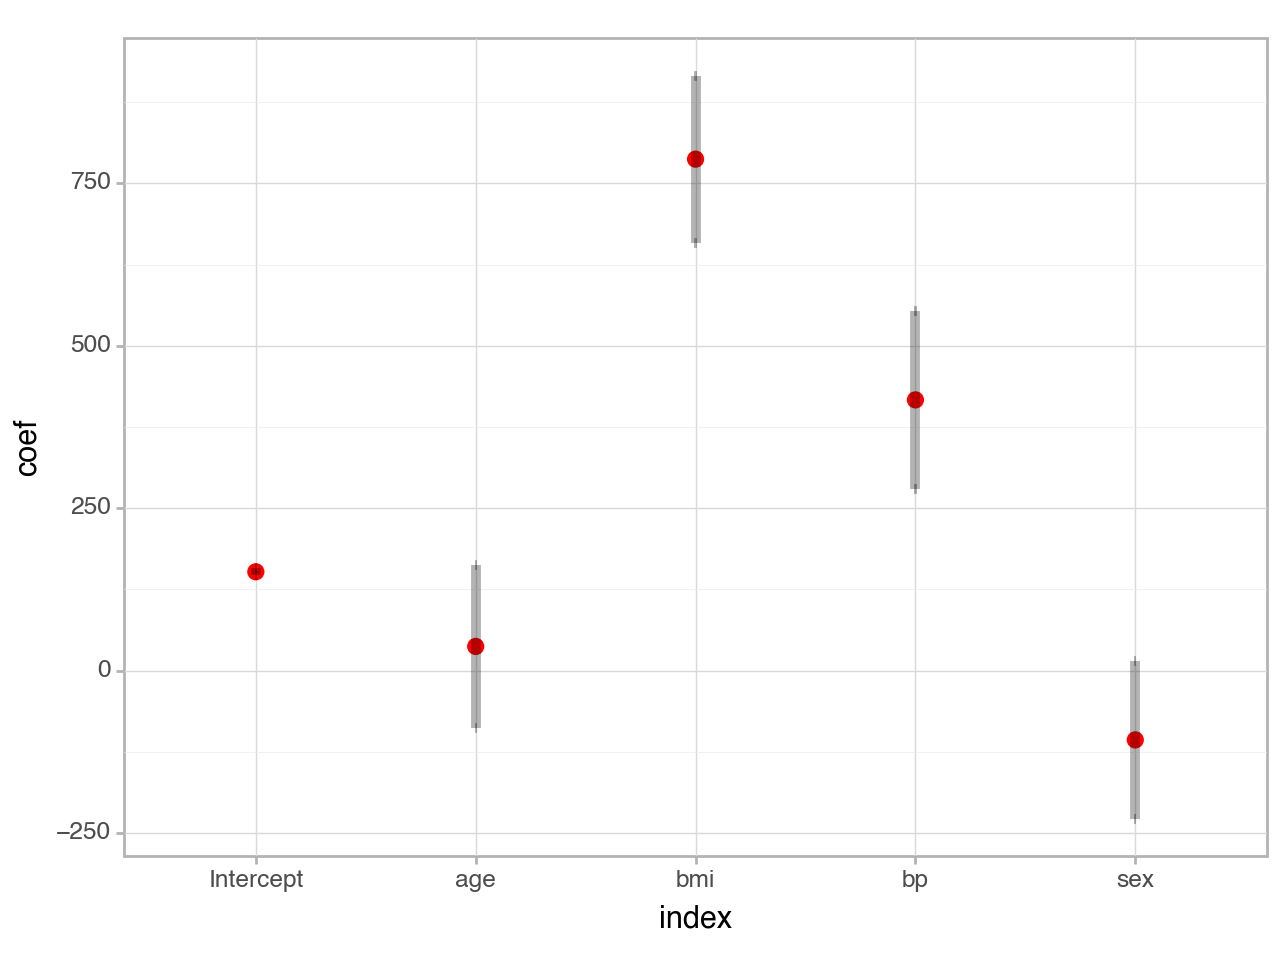

<Figure Size: (640 x 480)>

In [113]:
# Plot
plot = (ggplot(ols_tidy, aes(y='coef', x='index'))
        + geom_point(aes(y='coef'), size=3, fill="red", color="")
        + geom_errorbar(aes(ymin="lower", ymax="upper"), width=0.01, size=2, alpha=.3)
        + theme_light()
       )
plot


#### See more in the [documentation of statsmodels](https://www.statsmodels.org/stable/index.html)

## Pratice

Time for you to practice. 

- Estimate a different OLS model using the stats.models api. Add any variable you want to examine the effects
- Build a plot with: 
    - Points with the predicted outcomes for all observations based on your model (y-axis)
    - Points with observed valeus (x-axis)
    - Line with the perfect fit between y and x
    
Tips:

- You can get the fitted values with `model.fittedvalues`
- the perfect fit comes with a 45 degree line `geom_abline(intercept = 0, slope = 1, size = 0.5)`


Read more here for other diagnostics: https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html    

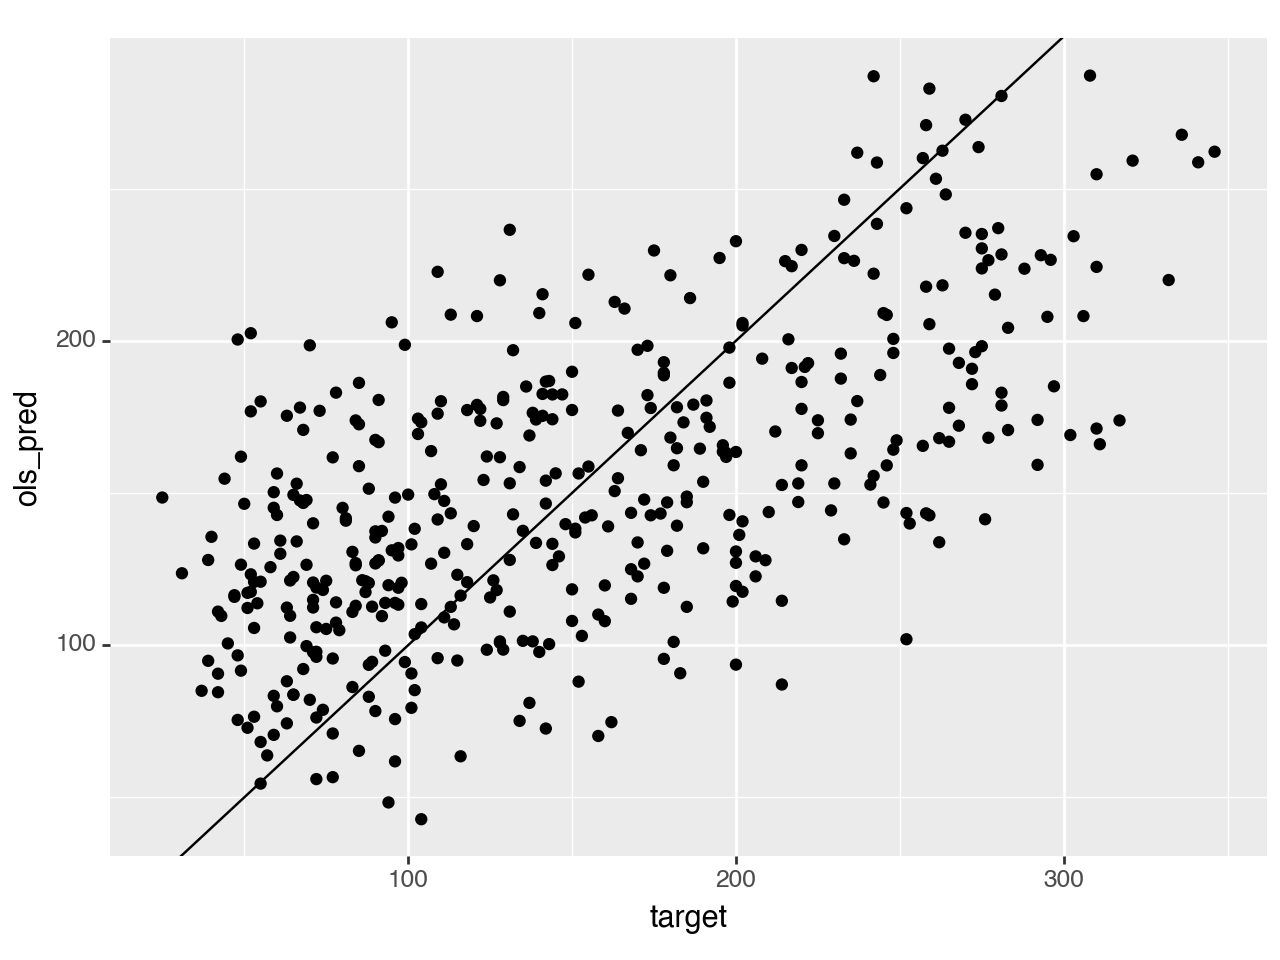

<Figure Size: (640 x 480)>

In [145]:
import matplotlib.pyplot as plt

diabetes["ols_pred"] = model_ols.fittedvalues

# plot
(ggplot(diabetes, aes(y="ols_pred", x="target")) +
 geom_point() +
 geom_abline(intercept = 0, slope = 1, size = 0.5)
 
)


## Statistical learning with sklearn

As we discussed in the lecture, in the macinhe learning tradition, we are interest in predictive modeling, instead of understanding relationship. This is the key feature on machine learning. 

- The goal i is to **_predict_** values of the outcome, $\hat{y}$
  
- Models are treated as a **_black box_**

- the model doesn't need to be interpretable as long as it provides an accurate prediction of $y$.

## Machine Learning Workflow

The figure below from Jorge Cimentada's book _Machine Learning for Social Science_ provides a nice summary of the traditional machine learning workiflow. 

![](https://cimentadaj.github.io/ml_socsci/img/socsci_wflow3_smaller.svg)

In words: 
    
- Start with a dataset
- Split between training and test
- Do some pre-processing
- Train the model (with or without cross-validation)
- Select best parameters (fine-tuning the model)
- Evaluate the model in the **test set.**

All these steps will be performed using the `sklearn` library. The documentation for `sklearn` is super rich. So I strongly encourage you to check their website and their tutorials: https://scikit-learn.org/stable/tutorial/index.html

### Simple Example: OLS just to learn the mechanics of the sklearn API

#### Open the dataset

In [154]:
# load dataset
import numpy as np
import pandas as pd
from sklearn import datasets

# load the dataset as a pandas dataframe
diabetes = datasets.load_diabetes(as_frame=True)["frame"]

# features
X = diabetes.drop(columns="target")

# target
y = diabetes["target"]

#### Split between training and test

In [156]:
# import function
from sklearn.model_selection import train_test_split

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.15, 
                                                    random_state = 417)

#### Pre-processing

In [160]:
# any missing? 
X.isna().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [164]:
# stardandization?
X.describe().loc[["mean", "std"],:]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02


In [165]:
# any categorical?
X.dtypes

age    float64
sex    float64
bmi    float64
bp     float64
s1     float64
s2     float64
s3     float64
s4     float64
s5     float64
s6     float64
dtype: object

this dataset is pretty much cleaned for us, we can skip pre-processing steps

#### Train the model

**IMPORTANT**: The modeling API follows the same frame work (despite the model). You can fit many different models with very similar code. Let's start with a simple OLS. 


In [170]:
# import model 
from sklearn.linear_model import LinearRegression

# Instantiate the modeling object
model = LinearRegression()

# Fit the model
model.fit(X_train,y_train)

LinearRegression()

#### Evaluate the model - use the test set!!

In [178]:
# Fit statistic (metric for how wrong we are) -- R^2
model.score(X_test,y_test)



In [180]:
## if you want to calculate the mean squared error
from sklearn.metrics import mean_squared_error

# predicted values
yhat = model.predict(X_test)

## estimate
mean_squared_error(y_test, yhat)

3325.658847637309

### Many, many models, and an API to rule them all!

Our performance with the simple linear regression was not great. Let's see if we get better using more complex models. We will try three different families of models. Again, you will learn about these models in DS II

- Elastic-net: linear model with regularization parameters. 
- Support Vector Machines: a supervised model that allows more non-linearity between the parametes
- Decision Tree: A model that uses a set of boolean rules in a non-parametric fashion that splits your data in multiple groups for supervised tasks. 


In [250]:
# setup for models
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# setup for metrics
from sklearn.metrics import mean_squared_error


# setup for dataset
from sklearn import datasets


In [251]:
# load the dataset as a pandas dataframe
diabetes = datasets.load_diabetes(as_frame=True)["frame"]

# features
X = diabetes.drop(columns="target")

# target
y = diabetes["target"]

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.15, 
                                                    random_state = 417)

In [252]:
# linear model

# Instantiate the modeling object
model_ols = LinearRegression()

# Fit the model
model_ols.fit(X_train,y_train)

# predic and calculate MSE
y_pred_ols = model_ols.predict(X_test)
mse_ols = mean_squared_error(y_test, y_pred_ols)

In [253]:
# Initialize and train the Elastic Net model
# alpha and l1_ratio are hyper parameter (learning is here!)
elastic_net = ElasticNet(alpha=0.01, l1_ratio=1)  
elastic_net.fit(X_train, y_train)

# Predict and calculate MSE
y_pred_en = elastic_net.predict(X_test)
mse_en = mean_squared_error(y_test, y_pred_en)

In [254]:
# Initialize and train the SVM model
svm = SVR(kernel='linear')  # Using linear kernel for demonstration
svm.fit(X_train, y_train)

# Predict and calculate MSE
y_pred_svm = svm.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)

In [255]:
# Initialize and train the Decision Tree model
tree = DecisionTreeRegressor(random_state=0,  max_depth=5)
tree.fit(X_train, y_train)

# Predict and calculate MSE
y_pred_tree = tree.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)

In [256]:
pd.DataFrame({"values":[mse_ols, mse_en,mse_svm, mse_tree], 
               "models":["ols", "elastic-net", "svm", "tree"]}).sort_values("values")

,values,models
1,3324.324519,elastic-net
0,3325.658848,ols
3,5184.585555,tree
2,7071.125649,svm


### Let's see the fit in the training data

In [257]:
# linear model

# Instantiate the modeling object
model_ols = LinearRegression()

# Fit the model
model_ols.fit(X_train,y_train)

# predic and calculate MSE
y_pred_ols = model_ols.predict(X_train)
mse_ols = mean_squared_error(y_train, y_pred_ols)

In [258]:
# Initialize and train the Elastic Net model
# alpha is a hyper parameter (learning is here!)
elastic_net = ElasticNet(alpha=0.01, l1_ratio=1)  
elastic_net.fit(X_train, y_train)

# Predict and calculate MSE
y_pred_en = elastic_net.predict(X_train)
mse_en = mean_squared_error(y_train, y_pred_en)

In [259]:
# Initialize and train the SVM model
svm = SVR(kernel='linear')  # Using linear kernel for demonstration
svm.fit(X_train, y_train)

# Predict and calculate MSE
y_pred_svm = svm.predict(X_train)
mse_svm = mean_squared_error(y_train, y_pred_svm)

In [260]:
# Initialize and train the Decision Tree model
tree = DecisionTreeRegressor(random_state=0,  max_depth=5)
tree.fit(X_train, y_train)

# Predict and calculate MSE
y_pred_tree = tree.predict(X_train)
mse_tree = mean_squared_error(y_train, y_pred_tree)

In [261]:
pd.DataFrame({"values":[mse_ols, mse_en,mse_svm, mse_tree], 
               "models":["ols", "elastic-net", "svm", "tree"]}).sort_values("values")

,values,models
3,2005.933021,tree
0,2793.124358,ols
1,2802.447120,elastic-net
2,5765.841372,svm


### Hyper-Parameter Tunning and Cross Validation

As you saw above, more advanced machine learning models have hyper-parameters. 

Hyperparameters are parameters that are not learned directly from the data but are set in advance before the training process begins, bur their best-values can be learned with training. Examples include the learning rate in gradient descent in deep-learning, the depth of a decision tree, or the number of neighbors in a k-nearest neighbors algorithm.

The way we choose the values for hyper-parameters is by looking at the performance of the models. 

### Cross-validation

If we were to find the best-values for hyperparameters looking always to the test-set, we would be pretty much training the model on the test set. Remember, we should always avoid this. The test set should be unseen data, and we should keep its integrity. This process is commonly described as [data leakage](https://towardsdatascience.com/what-is-data-leakage-and-how-can-it-be-avoided-in-machine-learning-eb435a27c3e3)

For this reason, when training machine learning models, we often rely on resampling methods, such as cross-validation. These methods allow us to fine tune our models by taking multiple samples of the training data, and training the model multiple times. 

Read here a nice and shor introduction to cross-validation: https://neptune.ai/blog/cross-validation-in-machine-learning-how-to-do-it-right

In [265]:
# lets see the mechanics first
from sklearn.model_selection import train_test_split # Train-test split
from sklearn.model_selection import LeaveOneOut # Leave One Out Cross Validation
from sklearn.model_selection import KFold # K-fold Cross validation

# Intialize the K-Folds (splits)
kf = KFold(n_splits=5)

# Split the data
k_splits = kf.split(X_train)

# Let's look at the splits
n_models =0
for train, test in k_splits:
    print(f"N Obs. to train on = {train.shape[0]}, N obs to test on = {test.shape[0]}") #
    n_models += 1 # Count the number of models

print(f"Total numbers of models run = {n_models}")


N Obs. to train on = 300, N obs to test on = 75
N Obs. to train on = 300, N obs to test on = 75
N Obs. to train on = 300, N obs to test on = 75
N Obs. to train on = 300, N obs to test on = 75
N Obs. to train on = 300, N obs to test on = 75
Total numbers of models run = 5


Let's implement using `sklearn`. We actually don't need a loop!

In [ ]:
# split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [273]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
params = {
    'alpha': [0.1, 0.5, 1, 2, 5],
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1]
}

elastic_net = ElasticNet()

# Grid search with 5-fold cross-validation
grid_en = GridSearchCV(elastic_net, params, cv=5, scoring='r2')
grid_en.fit(X_train, y_train)

# Best parameters and corresponding MSE
print("Best Elastic Net parameters:", grid_en.best_params_)
print("Best MSE:", grid_en.best_score_)


Best Elastic Net parameters: {'alpha': 0.1, 'l1_ratio': 1}
Best MSE: 0.4749866909033266


/Users/tb186/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.312e+05, tolerance: 1.722e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
/Users/tb186/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.202e+05, tolerance: 1.695e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV ins

In [274]:
from sklearn.tree import DecisionTreeRegressor

params = {
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10]
}

tree = DecisionTreeRegressor()

grid_tree = GridSearchCV(tree, params, cv=5, scoring='r2')
grid_tree.fit(X_train, y_train)

print("Best Decision Tree parameters:", grid_tree.best_params_)
print("Best MSE:", grid_tree.best_score_)


Best Decision Tree parameters: {'max_depth': 2, 'min_samples_split': 2}
Best MSE: 0.30384791044330417


In [275]:
from sklearn.neighbors import KNeighborsRegressor

params = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

knn = KNeighborsRegressor()

grid_knn = GridSearchCV(knn, params, cv=5, scoring='r2')
grid_knn.fit(X_train, y_train)

print("Best KNN parameters:", grid_knn.best_params_)
print("Best MSE:", grid_knn.best_score_)


Best KNN parameters: {'n_neighbors': 8}
Best MSE: 0.42592316067619407


In [288]:
# Select the best model based on cross-validation results
best_model = min([grid_en, grid_tree, grid_knn], key=lambda x: -x.best_score_)

In [290]:
# which model?
best_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=1)

In [292]:
# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate the test set MSE
mse_test = mean_squared_error(y_test, y_pred)
print(f"Test set MSE for the best model: {mse_test:.2f}")

Test set MSE for the best model: 3411.11


All of this only touches the top of the iceberg on Machine Learning. If you want to go ahead and learn more before DS II, I would suggest you to: 

- Read [Introduction to Statistical Learning in Python](https://www.statlearning.com/)

- Work through the [tutorials on sklearn webpage](https://scikit-learn.org/stable/index.html)